In [1]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

/home/varsha/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/varsha/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/varsha/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/varsha/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

SystemError: GPU device not found

In [2]:
import torch
if torch.cuda.is_available():    
  
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [3]:
!pip install transformers
import numpy as np
import pandas as pd
import os

In [6]:
df = pd.read_csv("/home/varsha/Desktop/presentation/training_data.csv")
print('Number of training sentences: {:,}\n'.format(df.shape[0]))
df.sample(10)

Number of training sentences: 2,000



,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,...,document_tone.1,sentences_tone.1,document_tones,fear,confident,analytical,sadness,joy,tentative,anger
893,[],['https://pbs.twimg.com/media/EOvaYfeU8AMCRZA....,False,False,0,['http://dlvr.it/RNPhF1'],NaN,0,[],0,...,"{'tones': [{'score': 0.955445, 'tone_id': 'ana...",NaN,"[{'score': 0.955445, 'tone_id': 'analytical', ...",NaN,NaN,1.0,NaN,NaN,NaN,NaN
356,[],['https://pbs.twimg.com/media/EOwKklpU8AIZ9nH....,True,False,3,['http://dlvr.it/RNQG2t'],NaN,1,[],4,...,"{'tones': [{'score': 0.955445, 'tone_id': 'ana...",NaN,"[{'score': 0.955445, 'tone_id': 'analytical', ...",NaN,NaN,1.0,NaN,NaN,NaN,NaN
1977,['SmartNews'],[],False,False,1,['https://www.reuters.com/article/us-china-hea...,NaN,0,[],0,...,"{'tones': [{'score': 0.508467, 'tone_id': 'joy...",NaN,"[{'score': 0.508467, 'tone_id': 'joy', 'tone_n...",NaN,NaN,1.0,NaN,1.0,NaN,NaN
70,"['Emerging', 'Virus', 'Preparedness', 'wuhan',...",[],True,False,15,[],NaN,2,[],6,...,{'tones': []},"[{'sentence_id': 0, 'text': 'Where is #Emergin...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1735,"['coronavirus', 'ChinaPneumonia', 'AcademicCha...",[],False,False,5,['https://twitter.com/WHO/status/1219317208205...,NaN,0,[],0,...,"{'tones': [{'score': 0.940706, 'tone_id': 'ana...","[{'sentence_id': 0, 'text': 'A novel strain of...","[{'score': 0.940706, 'tone_id': 'analytical', ...",NaN,NaN,1.0,NaN,NaN,1.0,NaN
1611,[],[],False,False,1,['https://www.theguardian.com/world/2020/jan/2...,NaN,0,[],0,...,"{'tones': [{'score': 0.882284, 'tone_id': 'ana...",NaN,"[{'score': 0.882284, 'tone_id': 'analytical', ...",NaN,NaN,1.0,NaN,NaN,NaN,NaN
446,[],[],False,True,0,[],1.219322e+18,0,"[{'screen_name': 'ImStevenMoney', 'user_id': '...",0,...,"{'tones': [{'score': 0.984352, 'tone_id': 'ten...",NaN,"[{'score': 0.984352, 'tone_id': 'tentative', '...",NaN,NaN,NaN,NaN,NaN,1.0,NaN
254,[],[],False,False,1,['http://bit.ly/2RdzMM8'],NaN,0,[],1,...,"{'tones': [{'score': 0.575112, 'tone_id': 'ana...",NaN,"[{'score': 0.575112, 'tone_id': 'analytical', ...",NaN,NaN,1.0,NaN,NaN,1.0,NaN
1467,[],[],False,False,0,['https://www.theguardian.com/world/2020/jan/2...,NaN,0,[],1,...,"{'tones': [{'score': 0.882284, 'tone_id': 'ana...",NaN,"[{'score': 0.882284, 'tone_id': 'analytical', ...",NaN,NaN,1.0,NaN,NaN,NaN,NaN
1891,['CoronaVirus'],[],False,False,3,[],NaN,0,[],1,...,{'tones': []},"[{'sentence_id': 0, 'text': ""A matter of time ...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
anger = df[['clean_text','anger']]
anger.anger = [np.nan_to_num(x) for x in anger['anger']]
anger = anger.astype({"anger": int})

/home/varsha/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
anger.sample(10)

,clean_text,anger
774,Indian School Teacher in Shenzhen to Contract ...,0
40,U.S. begins airport screenings as coronavirus ...,0
1433,China confirms human-to-human transmission of ...,0
361,Three Chinese quarantined in Kalibo for suspec...,0
183,#Latest #NewsPlus: Mysterious #coronavirus: #W...,0
1953,Coronavirus spreads to Beijing as China confir...,0
342,China confirms human-to-human transmission of ...,0
1555,UPDATE: Human-to-human transmission confirmed ...,0
1567,China is confrontet with a dangerous virus.....,0
1523,My Corona (virus)\n-The Knack,0


In [9]:
sentences = anger.clean_text.values
labels = anger.anger.values

In [10]:
from transformers import BertTokenizer
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [11]:
print(' Original: ', sentences[0])
print('Tokenized: ', tokenizer.tokenize(sentences[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Calmly panic buy all the tamiflu. #coronavirus
Tokenized:  ['calmly', 'panic', 'buy', 'all', 'the', 'tam', '##if', '##lu', '.', '#', 'corona', '##virus']
Token IDs:  [12885, 6634, 4965, 2035, 1996, 17214, 10128, 7630, 1012, 1001, 21887, 23350]


## Sentences to IDs

In [12]:
input_ids = []
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,  
                        add_special_tokens = True, 

                              )
    input_ids.append(encoded_sent)

print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Calmly panic buy all the tamiflu. #coronavirus
Token IDs: [101, 12885, 6634, 4965, 2035, 1996, 17214, 10128, 7630, 1012, 1001, 21887, 23350, 102]


## Padding & Truncating

In [13]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  123


In [14]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 200

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')

Using TensorFlow backend.



Padding/truncating all sentences to 200 values...

Padding token: "[PAD]", ID: 0

Done.


## Attention Masks

In [15]:
attention_masks = []

for sent in input_ids:
    
    att_mask = [int(token_id > 0) for token_id in sent]
    
    attention_masks.append(att_mask)

## Train/validation Split

In [16]:
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                            random_state=1999, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                              random_state=1999, test_size=0.1)


## Converting to Pytorch Form

In [17]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [18]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


# Modeling

In [20]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 2,    
    output_attentions = False, 
    output_hidden_states = False, 
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## Set Optimizer and Learning Rate

In [21]:
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, 
                  eps = 1e-8 
                )


In [22]:
from transformers import get_linear_schedule_with_warmup
epochs = 4

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                       num_warmup_steps = 0, 
                       num_training_steps = total_steps)

## Training Loop

In [23]:
import numpy as np
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [24]:
import time
import datetime

def format_time(elapsed):
    
    elapsed_rounded = int(round((elapsed)))
    
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [0]:
import random

seed_val = 18

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
loss_values = []
for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
       
        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        scheduler.step()
    avg_train_loss = total_loss / len(train_dataloader)            
    
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)
    print("")
    print("Running Validation...")

    t0 = time.time()
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:
        
        batch = tuple(t.to(device) for t in batch)
        
        b_input_ids, b_input_mask, b_labels = batch
        
        with torch.no_grad():        

            ation
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        
        logits = outputs[0]

    
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        eval_accuracy += tmp_eval_accuracy

        nb_eval_steps += 1
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    768.    Elapsed: 0:00:26.
  Batch    80  of    768.    Elapsed: 0:00:52.
  Batch   120  of    768.    Elapsed: 0:01:19.
  Batch   160  of    768.    Elapsed: 0:01:45.
  Batch   200  of    768.    Elapsed: 0:02:12.
  Batch   240  of    768.    Elapsed: 0:02:39.
  Batch   280  of    768.    Elapsed: 0:03:06.
  Batch   320  of    768.    Elapsed: 0:03:33.
  Batch   360  of    768.    Elapsed: 0:04:00.
  Batch   400  of    768.    Elapsed: 0:04:26.
  Batch   440  of    768.    Elapsed: 0:04:53.
  Batch   480  of    768.    Elapsed: 0:05:20.
  Batch   520  of    768.    Elapsed: 0:05:47.
  Batch   560  of    768.    Elapsed: 0:06:14.
  Batch   600  of    768.    Elapsed: 0:06:41.
  Batch   640  of    768.    Elapsed: 0:07:08.
  Batch   680  of    768.    Elapsed: 0:07:35.
  Batch   720  of    768.    Elapsed: 0:08:01.
  Batch   760  of    768.    Elapsed: 0:08:28.

  Average training loss: 0.50
  Training epcoh took: 0:08:33

R

## Plot Loss

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


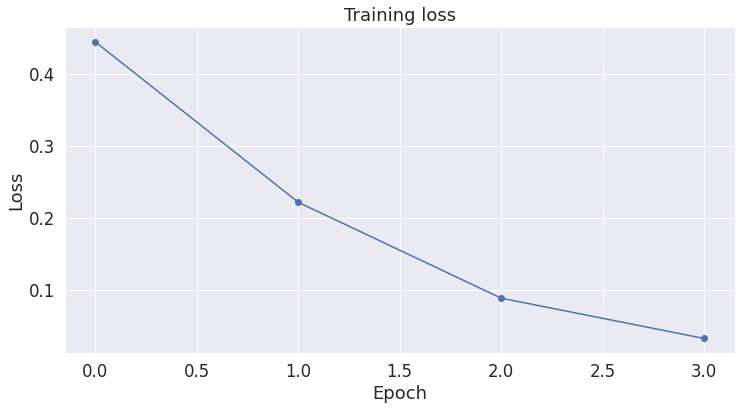

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(loss_values, 'b-o')
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# Perform on Test

In [0]:
import pandas as pd
df = pd.read_csv("/content/test_data_2.csv")
print('Number of test sentences: {:,}\n'.format(df.shape[0]))
anger = df[['clean_text','anger']]

Number of test sentences: 12,000



In [0]:
anger.anger = [np.nan_to_num(x) for x in anger['anger']]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
anger = anger.astype({"anger": int})

In [0]:
sentences = anger.clean_text.values
labels = anger.anger.values
input_ids = []
for sent in sentences:

    encoded_sent = tokenizer.encode(
                        sent,                      
                        add_special_tokens = True, '
                   )
    
    input_ids.append(encoded_sent)


input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")


attention_masks = []


for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 


prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

 
batch_size = 16  


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [0]:

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))


model.eval()


predictions , true_labels = [], []


for batch in prediction_dataloader:
  
  batch = tuple(t.to(device) for t in batch)
  
  b_input_ids, b_input_mask, b_labels = batch
  
  
  with torch.no_grad():
      
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 12,000 test sentences...
    DONE.


In [0]:
print('Positive samples: %d of %d (%.2f%%)' % (anger.anger.sum(), len(anger.anger), (anger.anger.sum() / len(anger.anger) * 100.0)))

Positive samples: 479 of 12000 (3.99%)


In [0]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []
print('Calculating Matthews Corr. Coef. for each batch...')

for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [0]:
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

## Output Test Results

In [0]:
frames = [flat_true_labels, flat_predictions]

In [0]:
table = pd.DataFrame(frames)

In [0]:
results = table.T
results.columns =['True', 'Pred'] 
results.head()

,True,Pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [0]:
table_to_save = sadness.merge(results, left_index=True, right_index=True)

In [0]:
table_to_save.to_csv('testing_data_results.csv')

# Label Other Tweets

In [0]:
df = pd.read_csv("/content/data_test_0308_0323.csv")
print('Number of unlabeled sentences: {:,}\n'.format(df.shape[0]))
analytical = df[['clean_text']]

Number of unlabeled sentences: 115,416



In [0]:
sentences = analytical.clean_text.values
input_ids = []
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,                      
                        add_special_tokens = True, 
                   )
    
    input_ids.append(encoded_sent)
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")
attention_masks = []
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
batch_size = 16  
prediction_data = TensorDataset(prediction_inputs, prediction_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [0]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
model.eval() 
predictions  = []
for batch in prediction_dataloader:
  
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask = batch
  
  
  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  predictions.append(logits)
  

print('    DONE.')

Predicting labels for 115,416 test sentences...


In [0]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [0]:
table1 = pd.DataFrame(flat_predictions)
table1.columns = ['pred_anger']
df1 = df[['text', 'timestamp', 'clean_text']]

In [0]:
pred_output1 = df1.merge(table1,left_index=True, right_index=True)
pred_output1.to_csv('data_test_0324_0408_anger_lite.csv')

In [0]:
len(pred_output1)

122541